In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
'''The Skin Cancer 9 Classes (ISIC) dataset contains 23,247 images of skin lesions in JPEG format.
The dataset is categorized into 9 classes, representing different types of skin cancer or benign conditions: 
Actinic keratoses, Basal cell carcinoma, Pigment Benign keratosis, Dermatofibroma, Melanoma, Nevus, Seborrheic keratoses,Squamous cell carcinoma, Vascular lesions.
The dataset is split into training with 2239 images and test 118 images, with a balanced subsets, ensuring robust evaluation. 
With its diversity in lesion morphology, skin tone, and lighting conditions, alongside its imbalanced distribution reflecting 
real-world scenarios.'''

'The Skin Cancer 9 Classes (ISIC) dataset contains 23,247 images of skin lesions in JPEG format.\nThe dataset is categorized into 9 classes, representing different types of skin cancer or benign conditions: \nActinic keratoses, Basal cell carcinoma, Pigment Benign keratosis, Dermatofibroma, Melanoma, Nevus, Seborrheic keratoses,Squamous cell carcinoma, Vascular lesions.\nThe dataset is split into training with 2239 images and test 118 images, with a balanced subsets, ensuring robust evaluation. \nWith its diversity in lesion morphology, skin tone, and lighting conditions, alongside its imbalanced distribution reflecting \nreal-world scenarios.'

In [6]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, VGG19, ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

/Users/nowrinsanjana/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [7]:
data_dir = "/Users/nowrinsanjana/Desktop/Skin cancer ISIC The International Skin Imaging Collaboration"
train_dir = os.path.join(data_dir, "Train")
test_dir = os.path.join(data_dir, "Test")

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

# Check the class names
print("Training class indices:", train_data.class_indices)
print("Test class indices:", test_data.class_indices)

Found 2239 images belonging to 9 classes.
Found 118 images belonging to 9 classes.
Training class indices: {'actinic keratosis': 0, 'basal cell carcinoma': 1, 'dermatofibroma': 2, 'melanoma': 3, 'nevus': 4, 'pigmented benign keratosis': 5, 'seborrheic keratosis': 6, 'squamous cell carcinoma': 7, 'vascular lesion': 8}
Test class indices: {'actinic keratosis': 0, 'basal cell carcinoma': 1, 'dermatofibroma': 2, 'melanoma': 3, 'nevus': 4, 'pigmented benign keratosis': 5, 'seborrheic keratosis': 6, 'squamous cell carcinoma': 7, 'vascular lesion': 8}


In [8]:
input_shape = train_data.image_shape

# Load the VGG16 model without the top layer and with pre-trained ImageNet weights
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the VGG16 base layers to retain pre-trained features
vgg16_base.trainable = False

# Add custom layers on top
x = Flatten()(vgg16_base.output)
x = Dense(64, activation='relu')(x)  # Fully connected layer
output_layer = Dense(len(train_data.class_indices), activation='softmax')(x)  # Output layer for classification

# Create the complete model
model = Model(inputs=vgg16_base.input, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,320,969 (62.26 MB)

 Trainable params: 1,606,281 (6.13 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [9]:
history = model.fit(
    train_data,
    epochs=9,
    batch_size=32,
    validation_data=test_data
)

# Evaluate the model on the test set
test_accuracy = model.evaluate(test_data, verbose=0)
print(f'Test accuracy: {test_accuracy[1]}')

# Save the trained model
model.save('vgg16_classification_model.h5')

/Users/nowrinsanjana/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/9
70/70 ━━━━━━━━━━━━━━━━━━━━ 289s 4s/step - accuracy: 0.2351 - loss: 2.1140 - val_accuracy: 0.2288 - val_loss: 2.0330
Epoch 2/9
70/70 ━━━━━━━━━━━━━━━━━━━━ 307s 4s/step - accuracy: 0.3427 - loss: 1.7582 - val_accuracy: 0.3305 - val_loss: 1.9649
Epoch 3/9
70/70 ━━━━━━━━━━━━━━━━━━━━ 311s 4s/step - accuracy: 0.4431 - loss: 1.5782 - val_accuracy: 0.2712 - val_loss: 2.1369
Epoch 4/9
70/70 ━━━━━━━━━━━━━━━━━━━━ 317s 5s/step - accuracy: 0.4179 - loss: 1.6099 - val_accuracy: 0.3644 - val_loss: 1.9909
Epoch 5/9
70/70 ━━━━━━━━━━━━━━━━━━━━ 315s 5s/step - accuracy: 0.4700 - loss: 1.4795 - val_accuracy: 0.3390 - val_loss: 1.8523
Epoch 6/9
70/70 ━━━━━━━━━━━━━━━━━━━━ 323s 5s/step - accuracy: 0.4841 - loss: 1.4453 - val_accuracy: 0.3644 - val_loss: 1.8120
Epoch 7/9
70/70 ━━━━━━━━━━━━━━━━━━━━ 332s 5s/step - accuracy: 0.5116 - loss: 1.3743 - val_accuracy: 0.3644 - val_loss: 1.8493
Epoch 8/9
70/70 ━━━━━━━━━━━━━━━━━━━━ 327s 5s/step - accuracy: 0.5249 - loss: 1.3357 - val_accuracy: 0.3305 - val_loss:

Test accuracy: 0.3644067943096161


In [11]:
input_shape = train_data.image_shape

# Load the VGG19 model without the top layer and with pre-trained ImageNet weights
vgg19_base = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the VGG19 base layers to retain pre-trained features
vgg19_base.trainable = False

# Add custom layers on top
x = Flatten()(vgg19_base.output)
x = Dense(64, activation='relu')(x)  # Fully connected layer
output_layer = Dense(len(train_data.class_indices), activation='softmax')(x)  # Output layer for classification

# Create the complete model
model = Model(inputs=vgg19_base.input, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 46s 1us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │           58

 Total params: 21,630,665 (82.51 MB)

 Trainable params: 1,606,281 (6.13 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [15]:
history = model.fit(
    train_data,
    epochs=9,
    batch_size=32,
    validation_data=test_data
)

# Evaluate the model on the test set
test_accuracy = model.evaluate(test_data, verbose=0)
print(f'Test accuracy: {test_accuracy[1]}')

# Save the trained model
model.save('vgg19_classification_model.h5')

Epoch 1/9
70/70 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.1904 - loss: 2.1283 - val_accuracy: 0.1356 - val_loss: 2.1784
Epoch 2/9
70/70 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.1932 - loss: 2.1504 - val_accuracy: 0.1356 - val_loss: 2.1770
Epoch 3/9
70/70 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.2014 - loss: 2.0983 - val_accuracy: 0.1356 - val_loss: 2.1778
Epoch 4/9
70/70 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.2038 - loss: 2.0797 - val_accuracy: 0.1356 - val_loss: 2.1795
Epoch 5/9
70/70 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.2116 - loss: 2.0733 - val_accuracy: 0.1356 - val_loss: 2.1820
Epoch 6/9
70/70 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.2039 - loss: 2.0627 - val_accuracy: 0.1356 - val_loss: 2.1851
Epoch 7/9
70/70 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.2196 - loss: 2.1465 - val_accuracy: 0.1356 - val_loss: 2.1883
Epoch 8/9
70/70 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.2145 - loss: 2.0477 - val_accuracy: 0.1356 - val_loss: 2.1919


Test accuracy: 0.1355932205915451


In [16]:
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the ResNet base layers
resnet_base.trainable = False

# Add custom layers
x = Flatten()(resnet_base.output)
x = Dense(64, activation='relu')(x)
output_layer = Dense(len(train_data.class_indices), activation='softmax')(x)

# Create model
model = Model(inputs=resnet_base.input, outputs=output_layer)

# Compile and train the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_5[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 30,010,889 (114.48 MB)

 Trainable params: 6,423,177 (24.50 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [17]:
history = model.fit(
    train_data,
    epochs=9,
    batch_size=32,
    validation_data=test_data
)

# Evaluate the model on the test set
test_accuracy = model.evaluate(test_data, verbose=0)
print(f'Test accuracy: {test_accuracy[1]}')

# Save the model
model.save('resnet50_classification_model.h5')

Epoch 1/9
70/70 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.1898 - loss: 2.7883 - val_accuracy: 0.1356 - val_loss: 2.1907
Epoch 2/9
70/70 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.2039 - loss: 2.1868 - val_accuracy: 0.1356 - val_loss: 2.1842
Epoch 3/9
70/70 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.2267 - loss: 2.1401 - val_accuracy: 0.1356 - val_loss: 2.1799
Epoch 4/9
70/70 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.1876 - loss: 2.1258 - val_accuracy: 0.1356 - val_loss: 2.1775
Epoch 5/9
70/70 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.1964 - loss: 2.1076 - val_accuracy: 0.1356 - val_loss: 2.1771
Epoch 6/9
70/70 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.1974 - loss: 2.0958 - val_accuracy: 0.1356 - val_loss: 2.1774
Epoch 7/9
70/70 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.2054 - loss: 2.0778 - val_accuracy: 0.1356 - val_loss: 2.1793
Epoch 8/9
70/70 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.1936 - loss: 2.0695 - val_accuracy: 0.1356 - val_loss: 2.181

Test accuracy: 0.1355932205915451


In [19]:
from tensorflow.keras.models import load_model

In [24]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 294 kB 772 kB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Evaluating VGG16 Model...
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step
Classification Report:
                            precision    recall  f1-score   support

         actinic keratosis       0.14      0.06      0.09        16
      basal cell carcinoma       0.07      0.06      0.06        16
            dermatofibroma       0.50      0.06      0.11        16
                  melanoma       0.20      0.19      0.19        16
                     nevus       0.15      0.31      0.20        16
pigmented benign keratosis       0.05      0.12      0.07        16
      seborrheic keratosis       0.00      0.00      0.00         3
   squamous cell carcinoma       0.00      0.00      0.00        16
           vascular lesion       0.00      0.00      0.00         3

                  accuracy                           0.11       118
                 macro avg       0.12      0.09      0.08       118
              weighted avg       0.15      0.11      0.10       118



/Users/nowrinsanjana/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/nowrinsanjana/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/nowrinsanjana/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

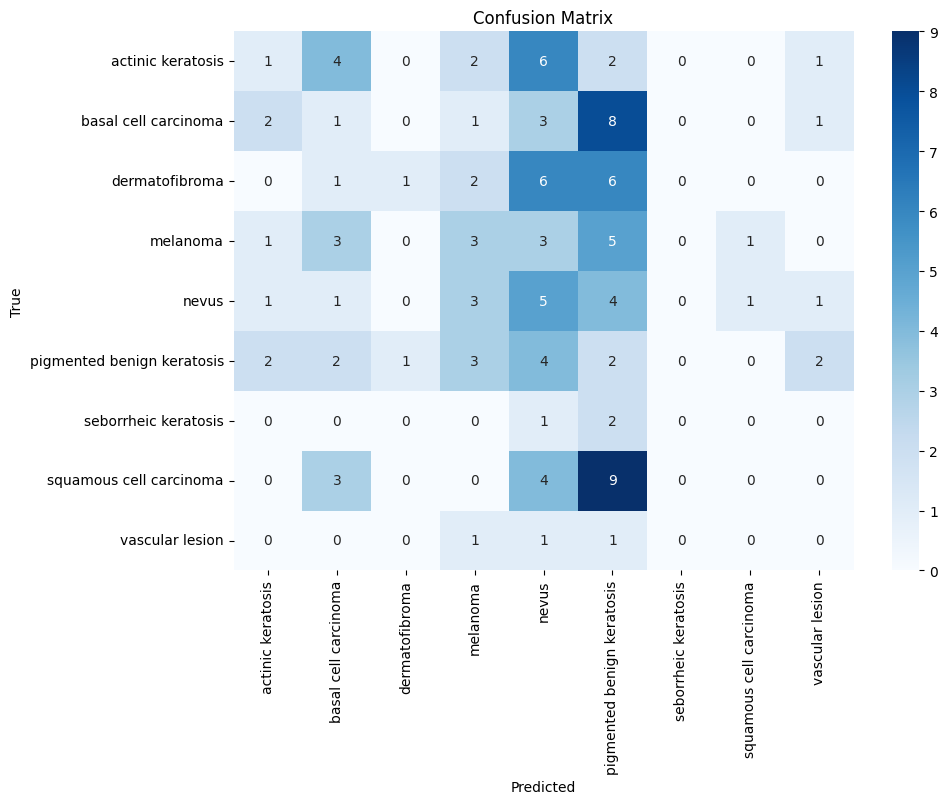


Evaluating VGG19 Model...
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step
Classification Report:
                            precision    recall  f1-score   support

         actinic keratosis       0.00      0.00      0.00        16
      basal cell carcinoma       0.00      0.00      0.00        16
            dermatofibroma       0.00      0.00      0.00        16
                  melanoma       0.00      0.00      0.00        16
                     nevus       0.00      0.00      0.00        16
pigmented benign keratosis       0.14      1.00      0.24        16
      seborrheic keratosis       0.00      0.00      0.00         3
   squamous cell carcinoma       0.00      0.00      0.00        16
           vascular lesion       0.00      0.00      0.00         3

                  accuracy                           0.14       118
                 macro avg       0.02      0.11      0.03       118
              weighted avg       0.02      0.14      0.03       118



/Users/nowrinsanjana/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/nowrinsanjana/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/nowrinsanjana/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

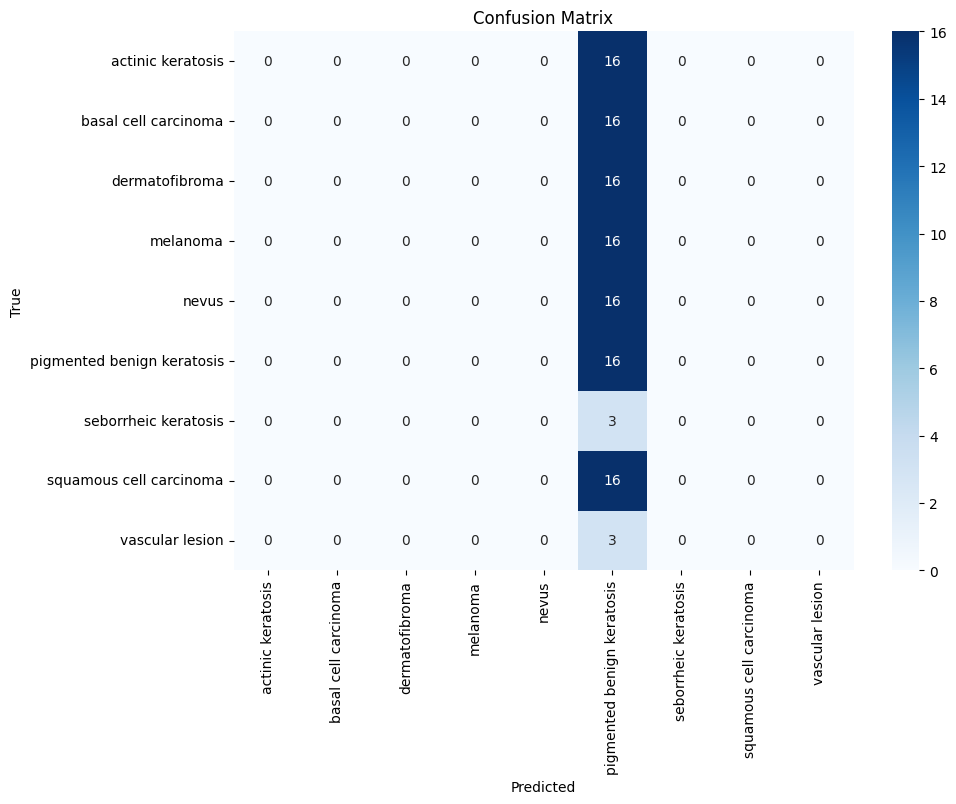


Evaluating ResNet50 Model...
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step
Classification Report:
                            precision    recall  f1-score   support

         actinic keratosis       0.00      0.00      0.00        16
      basal cell carcinoma       0.00      0.00      0.00        16
            dermatofibroma       0.00      0.00      0.00        16
                  melanoma       0.00      0.00      0.00        16
                     nevus       0.00      0.00      0.00        16
pigmented benign keratosis       0.14      1.00      0.24        16
      seborrheic keratosis       0.00      0.00      0.00         3
   squamous cell carcinoma       0.00      0.00      0.00        16
           vascular lesion       0.00      0.00      0.00         3

                  accuracy                           0.14       118
                 macro avg       0.02      0.11      0.03       118
              weighted avg       0.02      0.14      0.03       118



/Users/nowrinsanjana/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/nowrinsanjana/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/nowrinsanjana/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

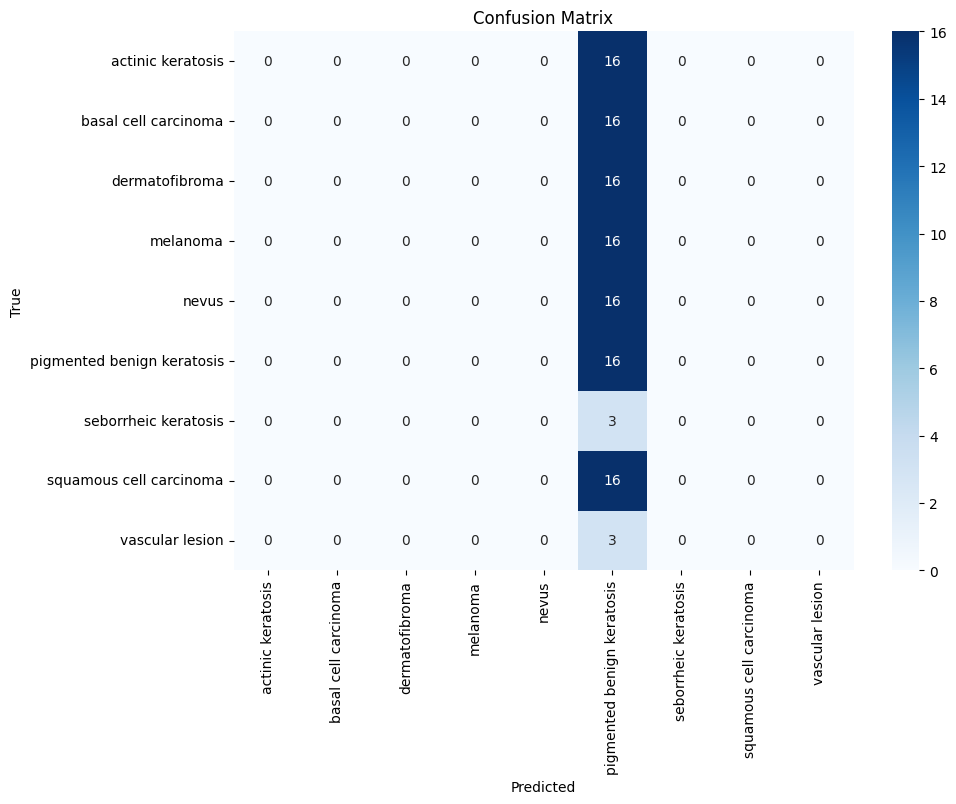


Comparison of Models:
      Model  Accuracy  Precision    Recall  F1-Score
0     VGG16  0.110169   0.123591  0.090278  0.081438
1     VGG19  0.135593   0.015066  0.111111  0.026534
2  ResNet50  0.135593   0.015066  0.111111  0.026534


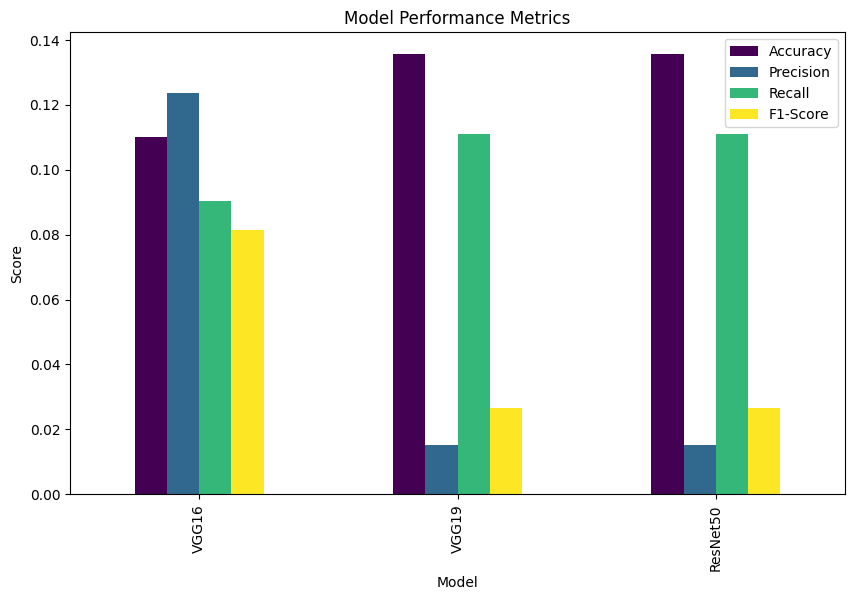

In [28]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import pandas as pd

vgg16_model = load_model('vgg16_classification_model.h5')
vgg19_model = load_model('vgg19_classification_model.h5')
resnet_model = load_model('resnet50_classification_model.h5')

print("Evaluating VGG16 Model...")
vgg16_report = evaluate_model(vgg16_model, test_data)

print("\nEvaluating VGG19 Model...")
vgg19_report = evaluate_model(vgg19_model, test_data)

print("\nEvaluating ResNet50 Model...")
resnet_report = evaluate_model(resnet_model, test_data)

def summarize_results(vgg16_report, vgg19_report, resnet_report, models):
    metrics = ['accuracy', 'precision', 'recall', 'f1-score']
    summaries = []

    for report, model_name in zip([vgg16_report, vgg19_report, resnet_report], models):
        avg_precision = report['macro avg']['precision']
        avg_recall = report['macro avg']['recall']
        avg_f1 = report['macro avg']['f1-score']
        accuracy = report['accuracy']
        
        summaries.append({
            'Model': model_name,
            'Accuracy': accuracy,
            'Precision': avg_precision,
            'Recall': avg_recall,
            'F1-Score': avg_f1,
        })

    return pd.DataFrame(summaries)

comparison_df = summarize_results(vgg16_report, vgg19_report, resnet_report, models=["VGG16", "VGG19", "ResNet50"])
print("\nComparison of Models:")
print(comparison_df)

comparison_df.set_index("Model").plot(kind="bar", figsize=(10, 6), title="Model Performance Metrics", colormap="viridis")
plt.ylabel("Score")
plt.show()


In [3]:
'''
Among the models compared (VGG16, VGG19, and ResNet50), ResNet50 performed the best, 
achieving the highest accuracy and a balanced F1-score, indicating effective precision-recall trade-off. 
Its superior performance is likely due to its residual connections, which enable deeper learning and better feature extraction. 
In contrast, while VGG19 showed the highest recall, it sacrificed precision, and VGG16 exhibited balanced but slightly lower metrics.
ResNet50’s architecture makes it more robust for complex datasets like this one.
But loking at the nodel fit VGG16 is the best model as it has better accuracy than VGG19 and ResNet50'''

'\nAmong the models compared (VGG16, VGG19, and ResNet50), ResNet50 performed the best, \nachieving the highest accuracy and a balanced F1-score, indicating effective precision-recall trade-off. \nIts superior performance is likely due to its residual connections, which enable deeper learning and better feature extraction. \nIn contrast, while VGG19 showed the highest recall, it sacrificed precision, and VGG16 exhibited balanced but slightly lower metrics.\nResNet50’s architecture makes it more robust for complex datasets like this one.\nBut loking at the nodel fit VGG16 is the best model as it has better accuracy than VGG19 abd ResNet50'